In [42]:
import pandas as pd
import requests
import numpy as np
from bs4 import BeautifulSoup

In [67]:
# Import bibliometrics data in python
c1 = pd.read_excel('c1.xlsx')

In [70]:
#Download the codes of coluns in database Web of Science and replace with full labels
def colunas(dataframe):
    page = requests.get("https://images.webofknowledge.com/images/help/WOS/hs_wos_fieldtags.html")
    soup = BeautifulSoup(page.content, 'html.parser')
    cod = soup.find('td').find_all('strong')
    trad = soup.find('td').find_all('p')
    traducao = [tr.get_text() for tr in trad]
    codigo = [c.get_text() for c in cod]
    del traducao[0]
    index = dataframe.columns
    nc = []
    for x in index:
        nc.append(traducao[codigo.index(x)])
    dataframe.columns = nc
    return dataframe

In [69]:
c1novo = colunas(c1)

In [80]:
#Create new dataframe for list all cods of publication and authors in rows 
i = 0
autores = pd.DataFrame()
for index, row in c1.iterrows():    
    if(';' in row['Authors']):    
        for x in row['Authors'].split(';'):            
            autores= autores.append(pd.DataFrame({'Codigo': i, 'Titulo': row['Document Title'], 'Autores': x}, index=[0]), ignore_index=True, sort=False)            
    else:
        autores= autores.append(pd.DataFrame({'Codigo': i, 'Titulo': row['Document Title'], 'Autores': row['Authors']}, index=[0]), ignore_index=True, sort=False)                
    i = i + 1

In [79]:
# This section convert simple table data in pivot table, similar of excel. More information https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html
pivottable = pd.pivot_table(autores, values='Titulo', index=['Autores'], columns=['Codigo'],aggfunc=np.count_nonzero, fill_value=0)

In [136]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('teste.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
pivottable.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()



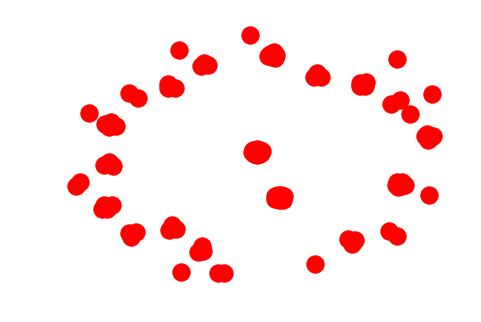